#                                        CRICKETERS IMAGE CLASSIFER 

OVERVIEW:

*using opencv for detection of faces.

*using python wavelet transform for converting images of faces in more efficient manner with less memory to extract important features.

*creating train and test data using converted images.

*using support vector machine algorithm to train the model.

*also checking with other algorithms whether they performing better than this or not and choosing the best model amongst them.

*saving model 


Importing :- opencv,numpy,matplotlib(for plotting), python wavlet transforms

In [3]:
import numpy as np
import cv2
import pywt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# CHECKING OF OPEN CV FUNCTIONS USING SAMPLE IMAGES FOR FACE DETECTION

Here Haar cascade claasifier is used for face detection.

HAAR CASCADE :- It is the classifier which uses sliding window technique 

5 types of features like edge features ,line features and rectangular features  are defined actually according to placements of  dark pixels and light pixels in a image

so while sliding through image they will search for these features and detects the eyes and face whether they are present or not in given image.

so for detecting these 5 types of features in a image we have to first train model with postive and negative images.

However open cv provides us trained haar cascade classifier, so for face detection in raw images or to make training data for our model I used this inbuilt haar cascade classifier.


In [4]:
img = cv2.imread('./txt_imgs/virat1.jpg')
img.shape

(634, 950, 3)

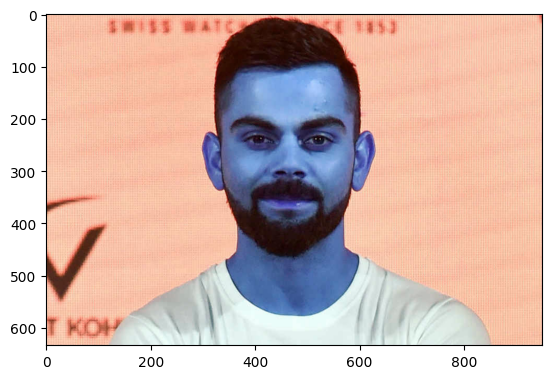

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(634, 950)

In [7]:
gray

array([[187, 191, 201, ..., 172, 161, 153],
       [181, 185, 195, ..., 160, 147, 141],
       [181, 185, 195, ..., 147, 134, 131],
       ...,
       [195, 202, 207, ..., 193, 197, 196],
       [181, 190, 197, ..., 205, 205, 180],
       [181, 190, 197, ..., 187, 171, 151]], dtype=uint8)

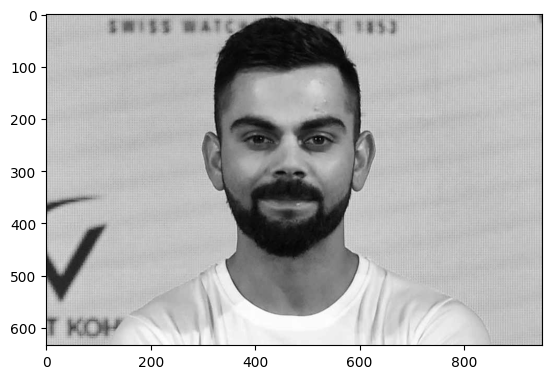

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./open cv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./open cv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.1,4)

In [10]:
faces

array([[294, 105, 342, 342]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(294, 105, 342, 342)

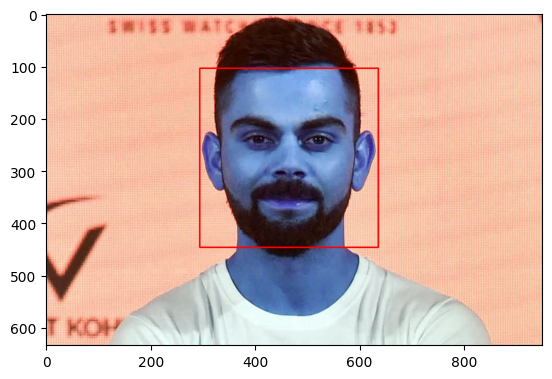

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

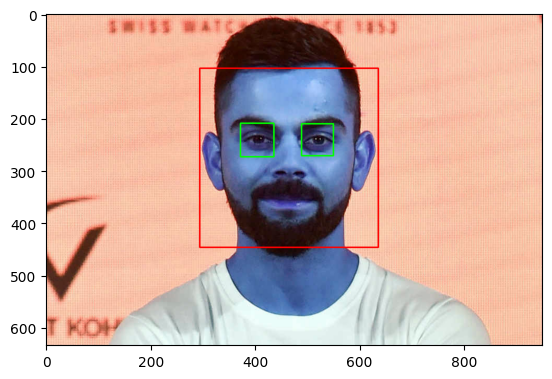

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(face_img,cmap='gray')


# Function for detecting faces

In [14]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.1,4)
    if(img is not None):
         for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color
    

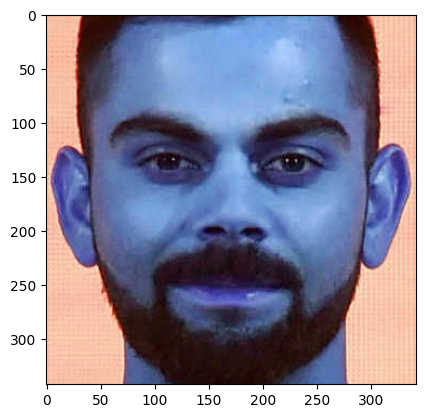

In [15]:
img1 = get_cropped_image('./txt_imgs/virat1.jpg')
plt.imshow(img1)

In [16]:
img2 = get_cropped_image('./txt_imgs/virat2.jpg')


path of dataset or raw images we have and path for storing faces 

In [17]:
path_data = "./images/"
path_cr = "./images/cropped/"

using python os library to read and write on files

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./images/a',
 './images/b',
 './images/c',
 './images/cropped',
 './images/d',
 './images/e']

creating a folder for storing faces i.e, cropped images

In [20]:
import shutil
if os.path.exists(path_cr):
    shutil.rmtree(path_cr)
os.mkdir(path_cr)

# code for detecting and storing faces of raw images

In [21]:
cropped_image_dirs = []
cricketer_file_name = {}
count = 1
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    cricketer_file_name[celebrity_name] =[]
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_cr + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" +cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            cricketer_file_name[celebrity_name].append(cropped_file_path)
            count +=1

In [22]:
cricketer_file_name

{'a': ['./images/cropped/a/a1.png',
  './images/cropped/a/a2.png',
  './images/cropped/a/a3.png',
  './images/cropped/a/a4.png',
  './images/cropped/a/a5.png',
  './images/cropped/a/a6.png',
  './images/cropped/a/a7.png',
  './images/cropped/a/a8.png',
  './images/cropped/a/a9.png',
  './images/cropped/a/a10.png',
  './images/cropped/a/a11.png',
  './images/cropped/a/a12.png',
  './images/cropped/a/a13.png',
  './images/cropped/a/a14.png',
  './images/cropped/a/a15.png',
  './images/cropped/a/a16.png',
  './images/cropped/a/a17.png',
  './images/cropped/a/a18.png',
  './images/cropped/a/a19.png',
  './images/cropped/a/a20.png',
  './images/cropped/a/a21.png',
  './images/cropped/a/a22.png',
  './images/cropped/a/a23.png',
  './images/cropped/a/a24.png',
  './images/cropped/a/a25.png',
  './images/cropped/a/a26.png',
  './images/cropped/a/a27.png',
  './images/cropped/a/a28.png',
  './images/cropped/a/a29.png',
  './images/cropped/a/a30.png',
  './images/cropped/a/a31.png',
  './images/

In [23]:
cropped_image_dirs

['./images/cropped/a',
 './images/cropped/b',
 './images/cropped/c',
 './images/cropped/d',
 './images/cropped/e']

# Function used for denoising the image using wavelet transforms 
# using python wavelets library

In [24]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

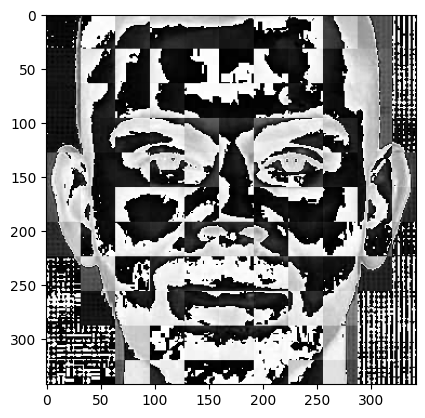

In [25]:
im_har = w2d(img1,'db1',5)
plt.imshow(im_har, cmap='gray')

Assinging  unique number to each cricketer for representing.

In [26]:
class_dict = {}
count = 0
for celebrity_name,training_files in cricketer_file_name.items():
    if celebrity_name == "cropped":
        continue
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

# creating dataset for traing model 

Here final attribute is vertically stacked image of wavlet transform of face image and face image

Targets are the numbers assigned to each cricketer as above.

In [27]:
X, y = [], []
for celebrity_name, training_files in cricketer_file_name.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     


Final dataset consits 450 arrays(images)

In [28]:
len(X)

484

Here each array has 4096 sub arrays which are nothing but representing each pixel of image 
if we see above our  image is size of 32x32x3(colour) + 32x32 (gray image after wavelet transform) nothing but 4096 pixels

In [29]:
X[0]

array([[199],
       [220],
       [218],
       ...,
       [ 16],
       [ 21],
       [ 24]], dtype=uint8)

In [30]:
len(X[0])

4096

In [31]:
32*32*3 +32*32

4096

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(484, 4096)

# TRAINING OF THE MODEL USING SVM 

IMPORTING SVM CLASSIFIER FROM SKLEARN AND OTHER REQUIRED LIBRARIES

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8181818181818182

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.85      0.92      0.88        25
           2       0.85      0.68      0.76        25
           3       0.93      0.87      0.90        15
           4       0.74      0.71      0.73        28

    accuracy                           0.82       121
   macro avg       0.83      0.82      0.82       121
weighted avg       0.82      0.82      0.82       121



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.804528,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.639079,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.804414,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [42]:
best_estimators['svm'].score(X_test,y_test)

0.8181818181818182

In [43]:
best_estimators['random_forest'].score(X_test,y_test)

0.6363636363636364

In [44]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7603305785123967

In [45]:
best_clf = best_estimators['svm']

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[26,  0,  1,  0,  1],
       [ 1, 23,  0,  0,  1],
       [ 2,  1, 17,  1,  4],
       [ 0,  1,  0, 13,  1],
       [ 4,  2,  2,  0, 20]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

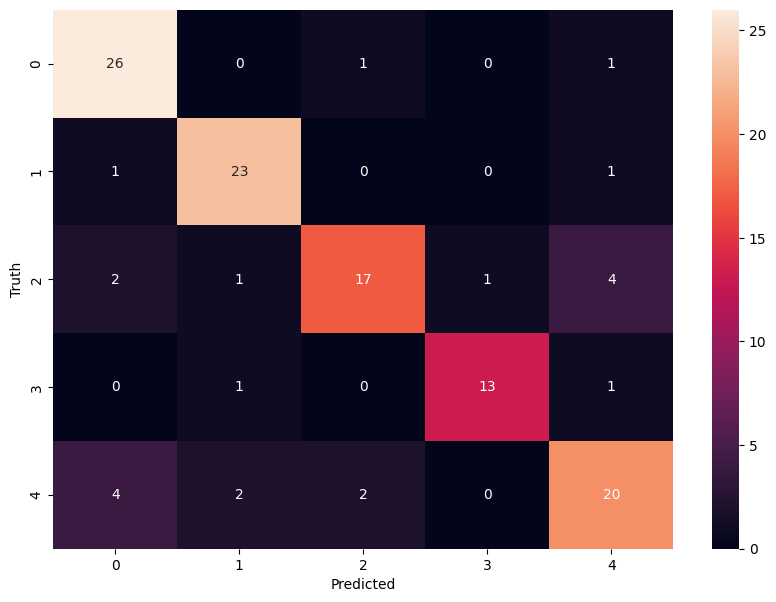

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
class_dict

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

# SAVING MODEL

In [49]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))